In [116]:
import os
import sys
sys.path.append('utils')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import types
from dataset.spot import TOTAL_STD, TOTAL_MEAN, SPOT
from utils.tool import picp, mpiw, rpiw, cwc

%matplotlib inline

In [117]:
def read_results(path):
    results = []
    for i in range(1, 51):
        filename = path+str(i)+'.csv'
        tmp = np.loadtxt(open(filename, "rb")) + TOTAL_MEAN
        tmp = tmp.reshape(-1)
        results += [list(tmp)]
    return results
    
    

In [118]:
path = './runs/pi/bootstrap/results/run'
results = np.array(read_results(path))

In [119]:
y = SPOT["2016":"2016-06-30"].values

In [120]:
mean = np.mean(results, axis=0)

In [121]:
mean

array([19.61299304, 16.63121738, 12.16888202, ..., 31.03887471,
       26.37965844, 22.88749667])

In [122]:
var_model = np.var(results, axis=0)

In [123]:
var_model

array([2.65544353, 2.66180951, 1.73303563, ..., 2.34539656, 2.89169542,
       2.69740457])

In [124]:
var = np.mean((y-mean)**2) + var_model

In [125]:
std = var**.5

In [126]:
lower_bound = mean - 2.81 * std
upper_bound = mean + 2.81 * std

In [127]:
picp(y, lower_bound, upper_bound)

0.9894688644688645

In [128]:
mpiw(y, lower_bound, upper_bound), mpiw(y, lower_bound, upper_bound, norm=1)

(28.27321289950102, 0.20437482217363753)

In [129]:
rpiw(y, lower_bound, upper_bound), rpiw(y, lower_bound, upper_bound, norm=1)

(28.29928340595244, 0.20456327458401358)

In [130]:
cwc(y, lower_bound, upper_bound, alpha=0.01)

0.41424989200153794

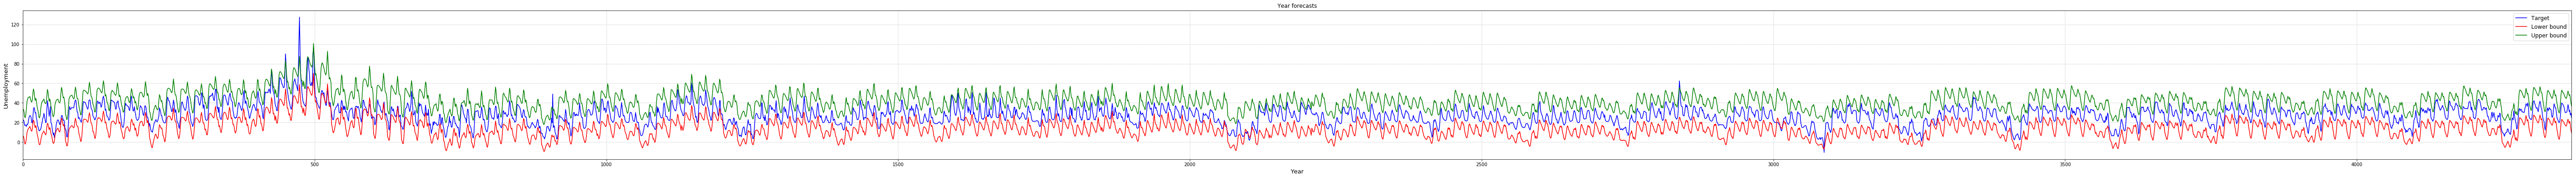

In [131]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(100,6))
plt.plot(x, y, color='blue', label='Target')
# plt.plot(x, mean, color='red', label='Target')
plt.plot(x, lower_bound, color='red', label='Lower bound')
plt.plot(x, upper_bound, color='green', label='Upper bound')

plt.xlim(0,182*24)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
plt.show()

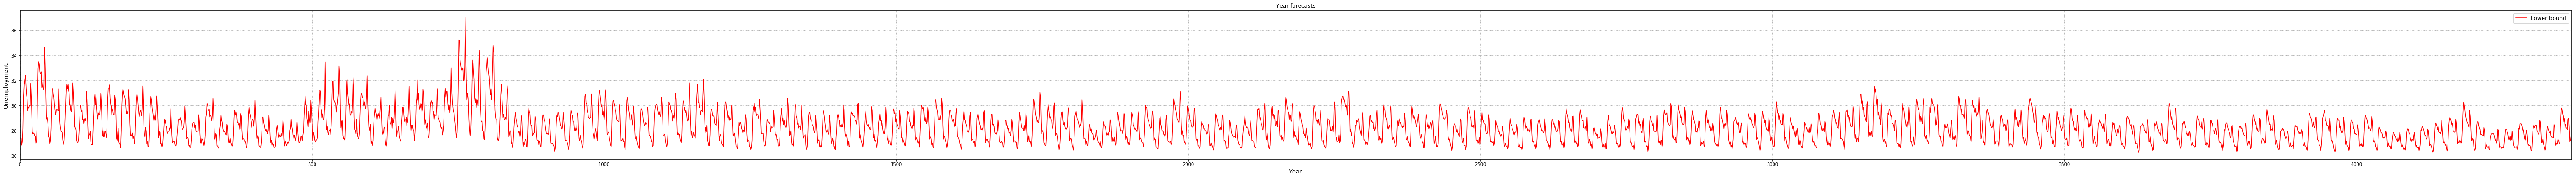

In [132]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(100,6))
plt.plot(x, upper_bound-lower_bound, color='red', label='Lower bound')

plt.xlim(0,182*24)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
plt.show()

In [134]:
# save bounds
bounds = np.stack((lower_bound, upper_bound))
np.save('./bounds/bootstrap_99.npy', bounds)

In [135]:
lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

In [136]:
picp(y, lower_bound, upper_bound)

0.9635989010989011

In [137]:
mpiw(y, lower_bound, upper_bound), mpiw(y, lower_bound, upper_bound, norm=1)

(19.720817538441988, 0.14255325674744823)

In [138]:
rpiw(y, lower_bound, upper_bound), rpiw(y, lower_bound, upper_bound, norm=1)

(19.739001948635867, 0.1426847039803084)

In [139]:
cwc(y, lower_bound, upper_bound, alpha=0.05)

0.14255325674744823

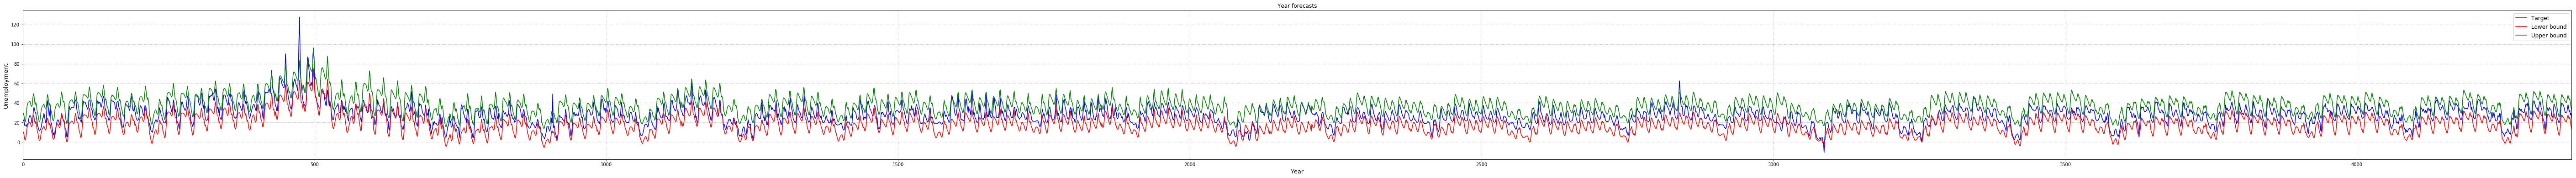

In [140]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(100,6))
plt.plot(x, y, color='blue', label='Target')
# plt.plot(x, mean, color='red', label='Target')
plt.plot(x, lower_bound, color='red', label='Lower bound')
plt.plot(x, upper_bound, color='green', label='Upper bound')

plt.xlim(0,182*24)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
plt.show()

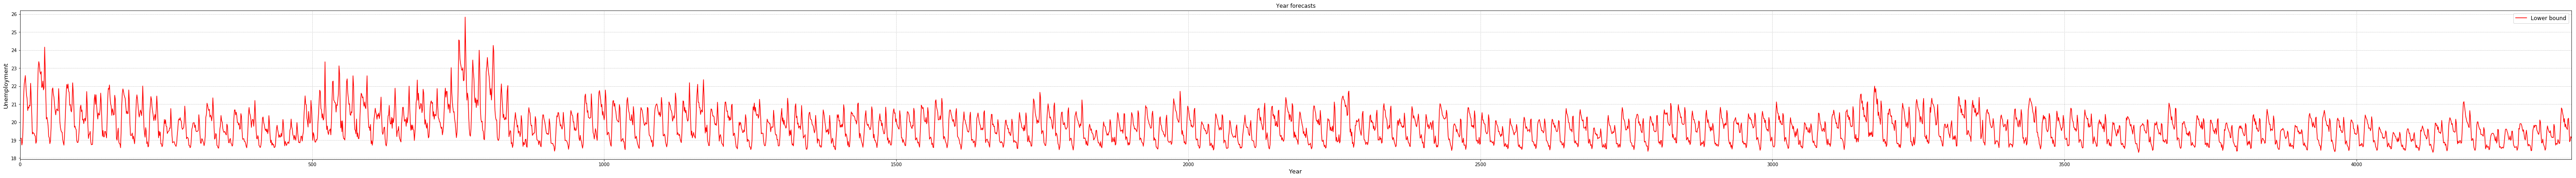

In [141]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(100,6))
plt.plot(x, upper_bound-lower_bound, color='red', label='Lower bound')

plt.xlim(0,182*24)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
plt.show()

In [142]:
# save bounds
bounds = np.stack((lower_bound, upper_bound))
np.save('./bounds/bootstrap_95.npy', bounds)